In [1]:
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import*
from scipy import special
from def_crs import*
from model_fct import*
from g_funct import*
from FBT import FBT 
from model_fct import*
from Sudakov.sudakov_factor import*
from Sudakov.evolve import evolve, sng
from set_FF.FF_akk import akk_ff
import scipy.integrate as integrate

/home/zackmrc/Documenti/git_project/SIDIS_epem_git/def_convolution_v3.1_survey_PV17_charm


In [2]:
def gk_bac(bt,z1):
    ml1= 1.115
    scale= 10.58 ## GeV
    bmax = 0.6
    bmin=2*e**(-euler_gamma)/scale
    
    
    eta_p= (1 - 4*ml1**2/z1**2/scale**2)
    zp1 = z1*sqrt(eta_p)   # momentum fraction
    zlc1 = (z1 + zp1)/2
    
    term = scale*zlc1/ml1
    logs = np.log(term)
    

    b_new = sqrt(bt**2 + bmin**2)
    g2 = 0.13
    esp =  g2*logs*b_new**2
    out =  np.exp(-esp)
    
    return out

In [3]:
def unpolarized_FF(zz,pt,flav):
        
        ## zz energy fractionm
        ## zp long fraction
        ## zlcl light cone fraction
        
        bmax = 0.6
        scale= 10.58 ## GeV
        
        ### bt_model
        mdl1 = model_bt()
        mdl1.mass = 1.115
        mdl1.qq = scale

        #### unpolarized FF model
        
        
        
        ### Sudakov factor
        scl = Soft(1)
        scl.bmax = bmax 
        scl.scale = scale
        scl.nf= 4
        
        
        
        ############################# 
        # Unpolarized FF
        ml1= 1.115
        eta_p= (1 - 4*ml1**2/zz**2/scale**2)
        zp1 = zz*sqrt(eta_p)   # momentum fraction
        zlc1 = (zz + zp1)/2
        
        def fnc(btt):
            model=mdl1.MD_bstar(btt,2.,zz,1.)
            sudakov=scl.analytic_sudakov(btt)
            sudakov=np.sqrt(sudakov)
            gk=gk_bac(btt,zz)

            dss1=akk_ff()
            dup1=dss1.D1('lbd',flav,zp1,scl.mu_b(btt))

            if flav in ['u','d','s']: fact=1/(2-zp1)
            if flav in ['ub','db','sb']: fact=(1-zp1)/(2-zp1)
            if flav in ['c','cb']: fact=0.5
            dup1=dup1*fact             
            
            res= dup1*model*sudakov*gk/zlc1
            return res
        
        test = lambda bt : bt*fnc(bt)
        
        N=10
        fbt = FBT(0)
        wfbt_unp = fbt.fbt(test,pt,N)

        return wfbt_unp

/home/zackmrc/Documenti/git_project/SIDIS_epem_git/def_convolution_v3.1_survey_PV17_charm/Sudakov/sudakov_factor.py:63: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar/(1-np.exp(-bt**4/self.bmin**4))**(1/4)


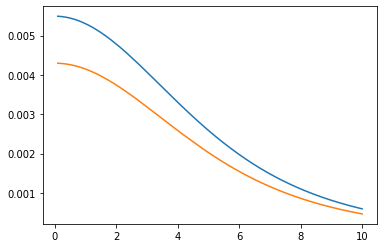

In [4]:
unp_u=array([])
unp_ub=array([])

pts=np.linspace(0.1,10,1000)
for pt in pts:
    unp_u=np.append(unp_u,unpolarized_FF(0.25,pt,'u'))
    unp_ub=np.append(unp_ub,unpolarized_FF(0.25,pt,'s'))

    #print(unp)

plot(pts,unp_u)
plot(pts,unp_ub)    

In [8]:
def jack(z1):

    ml=1.115
    q=10.58

    eta_p= (1 - 4*ml**2/z1**2/q**2)
    zp1 = z1*sqrt(eta_p)	# momentum fraction

    zlc1 = 1/2*(z1 + zp1)	#light-cone momentum fraction

    jack= 2/(1 + sqrt(eta_p))


    return jack, zlc1

def integral(zz,flav):
    ml1= 1.115
    scale= 10.58 ## GeV
    eta_p= (1 - 4*ml1**2/zz**2/scale**2)
    zp1 = zz*sqrt(eta_p)   # momentum fraction
    zlc1 = (zz + zp1)/2
    
    jacks, dummy = jack(zz)
     
        
        
    integrand=lambda pt : (pt**2/2/ml1/zlc1)*unpolarized_FF(zz,pt,flav)

    result = integrate.quad(integrand, 0.2, 10)[0]
    #print(result)
    return result*jacks*zlc1

In [9]:
jack(0.25)

(1.3005960165259969, 0.19221956458683565)

In [10]:
integral(0.25,'u')

/home/zackmrc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


0.2849586836078608

In [13]:
unp_int_U=array([])
unp_int_D=array([])
unp_int_S=array([])
zlcs=array([])
zs=np.linspace(0.25,0.7,20)
for z in zs: 
    #print(z)
    jacks, zl = jack(z)
    unp_int_U=np.append(unp_int_U,integral(z,'u'))
    unp_int_D=np.append(unp_int_D,integral(z,'d'))

    unp_int_S=np.append(unp_int_S,integral(z,'s'))

    zlcs=np.append(zlcs,zl)
    #print(unp_int)


/home/zackmrc/Documenti/git_project/SIDIS_epem_git/def_convolution_v3.1_survey_PV17_charm/Sudakov/sudakov_factor.py:63: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar/(1-np.exp(-bt**4/self.bmin**4))**(1/4)
/home/zackmrc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/home/zackmrc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator sh

In [16]:
unp_int_Ub=array([])
unp_int_Db=array([])
unp_int_Sb=array([])
zlcs=array([])
zs=np.linspace(0.25,0.7,20)
for z in zs: 
    #print(z)
    jacks, zl = jack(z)
    unp_int_Ub=np.append(unp_int_Ub,integral(z,'ub'))
    unp_int_Db=np.append(unp_int_Db,integral(z,'db'))

    unp_int_Sb=np.append(unp_int_Sb,integral(z,'sb'))

    zlcs=np.append(zlcs,zl)
    #print(unp_int)


/home/zackmrc/Documenti/git_project/SIDIS_epem_git/def_convolution_v3.1_survey_PV17_charm/Sudakov/sudakov_factor.py:63: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar/(1-np.exp(-bt**4/self.bmin**4))**(1/4)
/home/zackmrc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/home/zackmrc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator sh

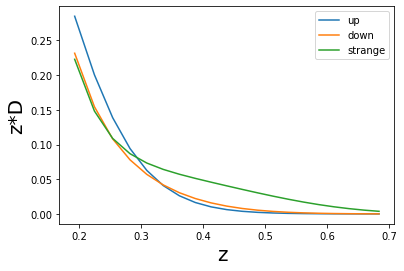

In [31]:
plot(zlcs,unp_int_U,label='up')
plot(zlcs,unp_int_D,label='down')
plot(zlcs,unp_int_S,label='strange')
ylabel(r'z*D',size=20)
xlabel(r'z ',size=20)
legend()
savefig('unpolarized_quark.png')


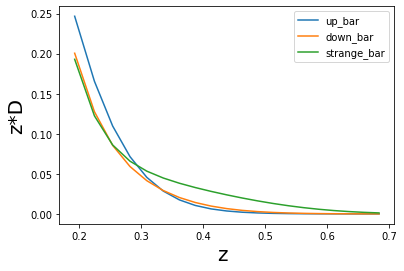

In [32]:
plot(zlcs,unp_int_Ub,label='up_bar')
plot(zlcs,unp_int_Db,label='down_bar')
plot(zlcs,unp_int_Sb,label='strange_bar')
ylabel(r'z*D',size=20)
xlabel(r'z ',size=20)
legend()
savefig('unpolarized_antiquark.png')
